|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from matplotlib import pyplot as plt

In [205]:
df_customer = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599328/customer_detail.csv")
df_order = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599329/order_detail.csv")
df_payment = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599330/payment_detail.csv")
df_sku = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599331/sku_detail.csv")

Text(0.5, 0, 'sku')

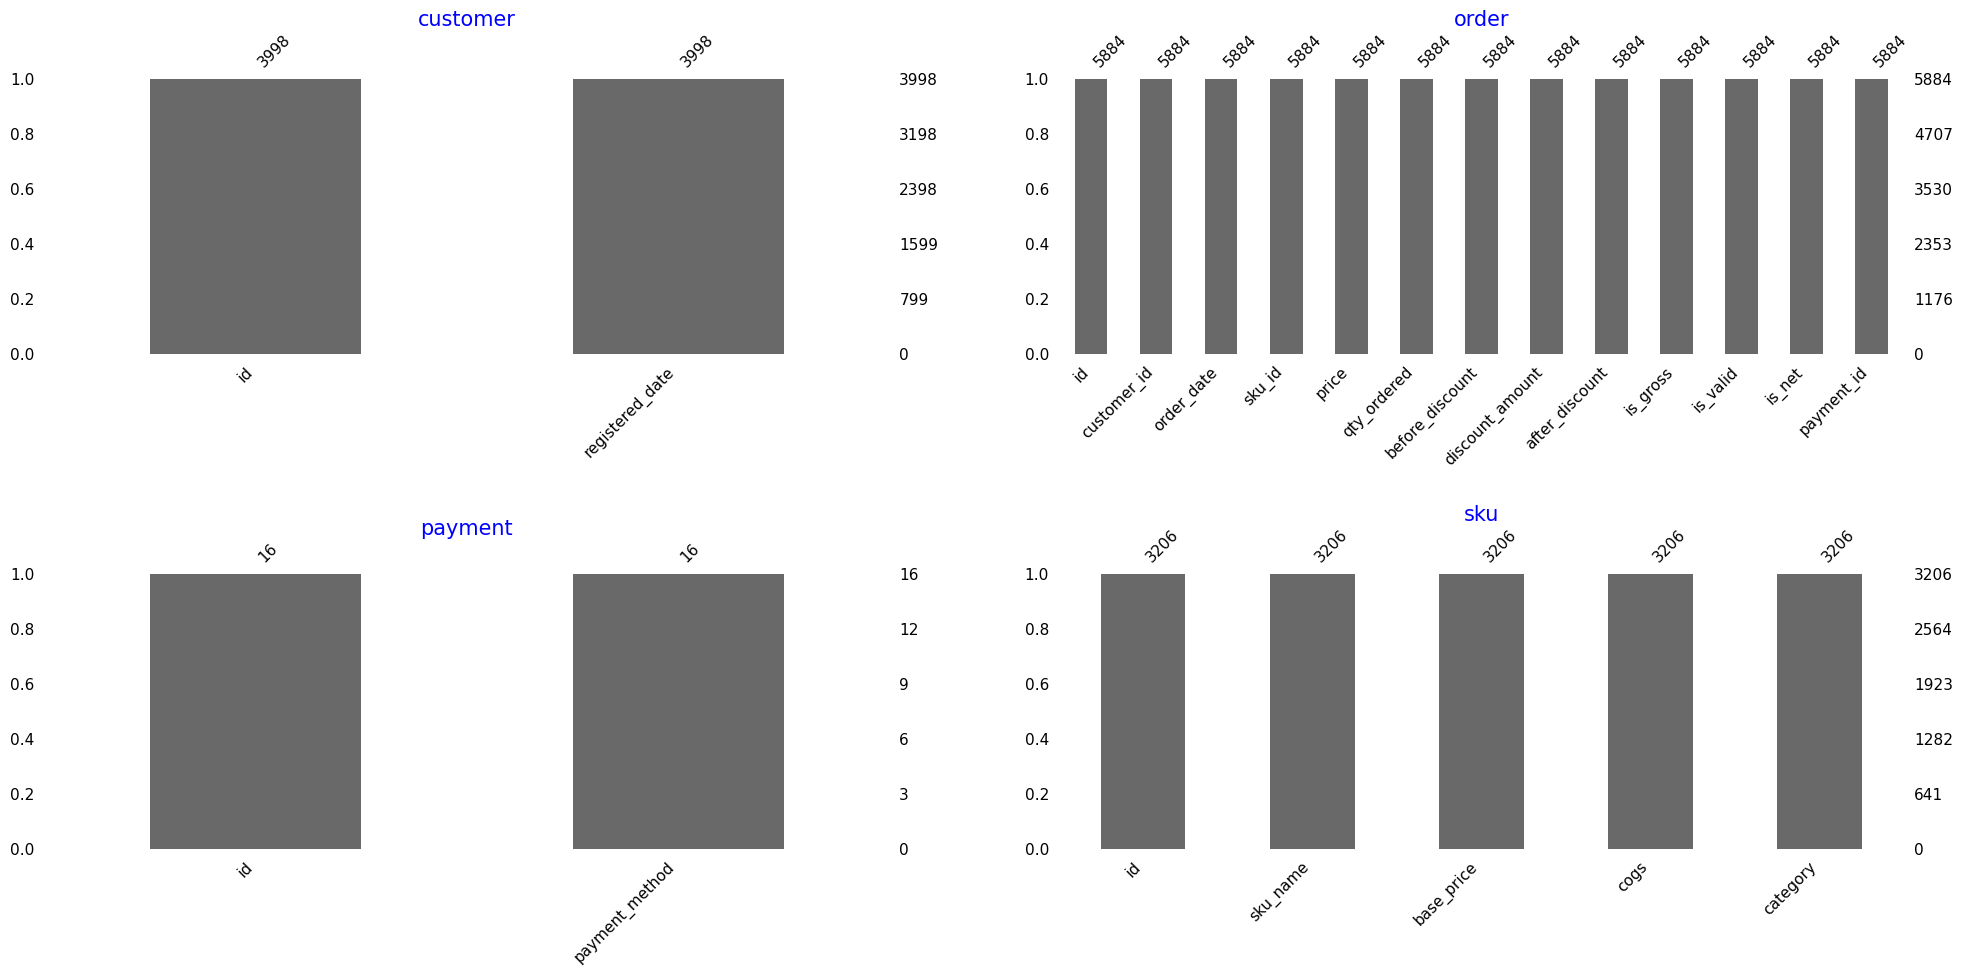

In [206]:
# Visualize nan
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=.8)
fig.add_subplot(2, 2, 1)
msno.bar(df_customer, fontsize=11)
plt.xlabel("customer", fontdict={'size':15, 'color':'b'})
fig.add_subplot(2,2,2)
msno.bar(df_order, fontsize=11)
plt.xlabel("order", fontdict={'size':15,'color':'b'})
fig.add_subplot(2,2,3)
msno.bar(df_payment, fontsize=11)
plt.xlabel("payment", fontdict={'size':15,'color':'b'})
fig.add_subplot(2,2,4)
msno.bar(df_sku, fontsize=11)
plt.xlabel("sku", fontdict={'size':15,'color':'b'})


<p>Figure above shown no nan data.</p>

In [207]:
df_customer.head(3)

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23


In [208]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3998 non-null   object
 1   registered_date  3998 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [209]:
df_customer['registered_date'] = df_customer.registered_date.astype('datetime64[ns]')

In [210]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_id           5884 non-null   object 
 4   price            5884 non-null   int64  
 5   qty_ordered      5884 non-null   int64  
 6   before_discount  5884 non-null   float64
 7   discount_amount  5884 non-null   float64
 8   after_discount   5884 non-null   float64
 9   is_gross         5884 non-null   int64  
 10  is_valid         5884 non-null   int64  
 11  is_net           5884 non-null   int64  
 12  payment_id       5884 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 597.7+ KB


In [211]:
df_order['order_date'] = df_order.order_date.astype('datetime64[ns]')

In [212]:
filtered_cols = df_order.select_dtypes(include=['int64', 'float64']).columns
filtered_cols = filtered_cols[~filtered_cols.isin(['is_gross', 'is_valid','is_net', 'payment_id'])]

price                 Axes(0.125,0.53;0.227941x0.35)
qty_ordered        Axes(0.398529,0.53;0.227941x0.35)
before_discount    Axes(0.672059,0.53;0.227941x0.35)
discount_amount       Axes(0.125,0.11;0.227941x0.35)
after_discount     Axes(0.398529,0.11;0.227941x0.35)
dtype: object

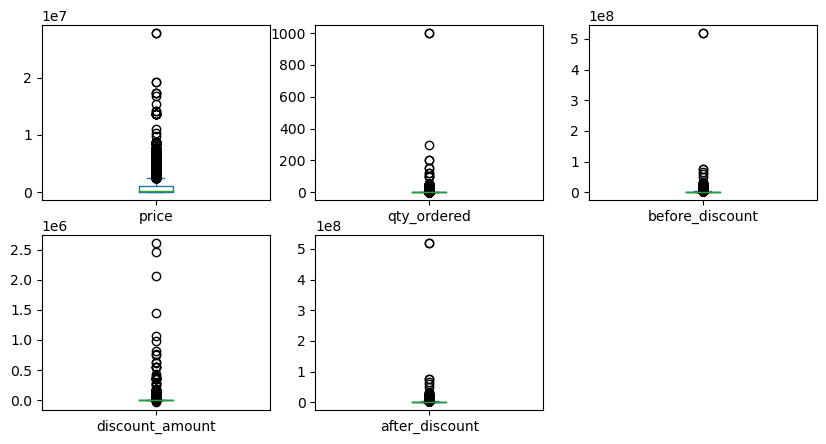

In [213]:
df_plot = df_order.loc[:, filtered_cols]
df_plot.plot(kind='box', layout=(2,3), subplots=True, figsize=(10,5))

In [214]:
list_items = []
for col in df_plot.columns:
    list_items.append([col, df_order[col].min(), df_order[col].max()])

pd.DataFrame(columns=['cols', 'min', 'max'], data=list_items)

,cols,min,max
0,price,0.0,27782000.0
1,qty_ordered,1.0,1000.0
2,before_discount,0.0,518752000.0
3,discount_amount,-34771.0,2610000.0
4,after_discount,0.0,518752000.0


In [215]:
# Remove row with discount amount < 0
df_order.drop(df_order[df_order.discount_amount < 0].index, inplace=True)

In [216]:
df_order.loc[:, filtered_cols].describe().round(1).loc[['min', 'max', '25%', '50%', '75%']]

,price,qty_ordered,before_discount,discount_amount,after_discount
min,0.0,1.0,0.0,0.0,0.0
max,27782000.0,1000.0,518752000.0,2610000.0,518752000.0
25%,63510.0,1.0,92800.0,0.0,92742.0
50%,203000.0,1.0,244296.0,0.0,243600.0
75%,1017900.0,1.0,1247000.0,0.0,1227570.0


In [217]:
# Check customer with the highest 'after discount'
df_order[df_order.after_discount == 518752000]

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
299,ODR1510991605c,C206125L,2022-08-06,P313303,518752,1000,518752000.0,0.0,518752000.0,1,0,0,2
300,ODR4269164386x,C460487L,2022-09-06,P313303,518752,1000,518752000.0,0.0,518752000.0,1,1,1,2


In [218]:
df_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3206 non-null   object 
 1   sku_name    3206 non-null   object 
 2   base_price  3206 non-null   float64
 3   cogs        3206 non-null   int64  
 4   category    3206 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 125.4+ KB


In [219]:
df_sku.category.unique()

array(['Kids & Baby', 'Appliances', 'Men Fashion', 'Superstore',
       'Computing', 'School & Education', 'Women Fashion',
       'Entertainment', 'Others', 'Mobiles & Tablets', 'Home & Living',
       'Health & Sports', 'Beauty & Grooming', 'Soghaat', 'Books'],
      dtype=object)

In [220]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16 non-null     int64 
 1   payment_method  16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [221]:
df_payment.payment_method.unique()

array(['cod', 'jazzvoucher', 'customercredit', 'Payaxis', 'jazzwallet',
       'easypay_voucher', 'Easypay', 'ublcreditcard', 'mygateway',
       'mcblite', 'cashatdoorstep', 'internetbanking', 'Easypay_MA',
       'productcredit', 'marketingexpense', 'financesettlement'],
      dtype=object)

In [222]:
# Check duplicate
print("customer_duplicate :", df_customer.duplicated(subset='id').sum())
print("sku_duplicate :", df_sku.duplicated(subset='id').sum())
print("payment_duplicate :", df_payment.duplicated(subset='id').sum())
# I allowed duplication in order_detail since 1 transaction id can have multiple order items.

customer_duplicate : 0
sku_duplicate : 0
payment_duplicate : 0


### SQL

In [223]:
from sqlite3 import connect

In [224]:
conn = connect(':memory:')

In [225]:
df_customer.to_sql(con=conn, index=False, if_exists='replace', name='customer_detail')
df_order.to_sql(con=conn, index=False, if_exists='replace', name='order_detail')
df_sku.to_sql(con=conn, index=False, if_exists='replace', name='sku_detail')
df_payment.to_sql(con=conn, index=False, if_exists='replace', name='payment_detail')

16

In [226]:
df = pd.read_sql("""
SELECT 
    od.id, cd.registered_date, od.customer_id, od.order_date, sk.sku_name, sk.category,
    sk.cogs, od.price, od.qty_ordered, od.before_discount, od.discount_amount, od.after_discount,
    od.is_gross, od.is_valid, od.is_net, pd.payment_method
FROM order_detail od
LEFT JOIN customer_detail cd ON cd.id = od.customer_id
LEFT JOIN sku_detail sk ON sk.id = od.sku_id
LEFT JOIN payment_detail pd ON pd.id = od.payment_id
""", conn)

In [227]:
df.to_csv('sales_order.csv',index=False, encoding="utf-8")

In [228]:
display(df.head(5))
df.shape

,id,registered_date,customer_id,order_date,sku_name,category,cogs,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_method
0,ODR9939707760w,2021-07-07 00:00:00,C713589L,2021-11-19 00:00:00,RB_Dettol Germ Busting Kit-bf,Others,18270,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,jazzwallet
1,ODR7448356649d,2021-11-20 00:00:00,C551551L,2021-11-19 00:00:00,PS4_Slim-500GB,Entertainment,1321182,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,jazzwallet
2,ODR4011281866z,2021-11-19 00:00:00,C685596L,2021-11-25 00:00:00,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,Entertainment,5162580,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,Payaxis
3,ODR3378927994s,2021-11-03 00:00:00,C830683L,2021-11-22 00:00:00,dawlance_Inverter 30,Appliances,3054628,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,jazzwallet
4,ODR4904430099k,2021-07-05 00:00:00,C191766L,2021-11-21 00:00:00,Dawlance_Inverter-45 2.0 ton,Appliances,3177472,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,Payaxis


(5883, 16)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5883 non-null   object 
 1   registered_date  5883 non-null   object 
 2   customer_id      5883 non-null   object 
 3   order_date       5883 non-null   object 
 4   sku_name         5883 non-null   object 
 5   category         5883 non-null   object 
 6   cogs             5883 non-null   int64  
 7   price            5883 non-null   int64  
 8   qty_ordered      5883 non-null   int64  
 9   before_discount  5883 non-null   float64
 10  discount_amount  5883 non-null   float64
 11  after_discount   5883 non-null   float64
 12  is_gross         5883 non-null   int64  
 13  is_valid         5883 non-null   int64  
 14  is_net           5883 non-null   int64  
 15  payment_method   5883 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory usage: 735.5+ KB


In [230]:
date_maps = {
    'registered_date':'datetime64[ns]',
    'order_date':'datetime64[ns]'
}
df = df.astype(date_maps)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5883 non-null   object        
 1   registered_date  5883 non-null   datetime64[ns]
 2   customer_id      5883 non-null   object        
 3   order_date       5883 non-null   datetime64[ns]
 4   sku_name         5883 non-null   object        
 5   category         5883 non-null   object        
 6   cogs             5883 non-null   int64         
 7   price            5883 non-null   int64         
 8   qty_ordered      5883 non-null   int64         
 9   before_discount  5883 non-null   float64       
 10  discount_amount  5883 non-null   float64       
 11  after_discount   5883 non-null   float64       
 12  is_gross         5883 non-null   int64         
 13  is_valid         5883 non-null   int64         
 14  is_net           5883 non-null   int64  

In [231]:
list_items = []

filtered = df.select_dtypes('object').columns
filtered = filtered[~filtered.isin(['customer_id', 'sku_name'])]
for col in df.loc[:, filtered].columns:
    list_items.append([col, df[col].dtypes, df[col].nunique(), df[col].unique()])

pd.set_option('display.max_colwidth', None)
pd.DataFrame(columns=['features', 'type', 'n unique', 'unique'], data=list_items)

,features,type,n unique,unique
0,id,object,5763,"[ODR9939707760w, ODR7448356649d, ODR4011281866z, ODR3378927994s, ODR4904430099k, ODR7618778722h, ODR7610732813d, ODR4415476736l, ODR6474755771h, ODR9699658949w, ODR6859592351r, ODR2741972772y, ODR5064165483d, ODR8655835343e, ODR6180629046t, ODR8451284001a, ODR2537552109g, ODR1965502162e, ODR8450052777q, ODR2268957100j, ODR7673587024b, ODR7333927150n, ODR5577016106c, ODR2742098359u, ODR8871522735u, ODR2463904091r, ODR6490492565x, ODR8571593980v, ODR6931838372y, ODR3638381880v, ODR9082271739m, ODR7786748966g, ODR8603367876u, ODR3138948564v, ODR6438394533v, ODR1691826218q, ODR7001698821u, ODR4038166477p, ODR2670401704u, ODR4788160083h, ODR3911162372f, ODR1682702313i, ODR1930700725k, ODR8227209830v, ODR1282129843m, ODR8524995988x, ODR2677333053l, ODR3911485437u, ODR6257188294v, ODR7358532156c, ODR7345593685t, ODR9772614440a, ODR2038445780c, ODR3056818607f, ODR1552624241a, ODR4584946511r, ODR3666240908f, ODR3307723885c, ODR3042821814j, ODR9240428551v, ODR9861293389m, ODR1934504823t, ODR4584584232t, ODR8765194693i, ODR8324207191r, ODR7636766563z, ODR2253386908p, ODR4349856216c, ODR9742859929l, ODR5844815376j, ODR9801833134g, ODR3285485494w, ODR6596011115s, ODR1393906883x, ODR8648637213r, ODR5374673151h, ODR3517561564r, ODR5050363774l, ODR8854148252t, ODR1653549677a, ODR7982663802t, ODR3715817392d, ODR8016343320s, ODR8181443587g, ODR4856239093a, ODR8840710864r, ODR4364569521q, ODR5408248410v, ODR8147245502x, ODR4214658143e, ODR5715333378w, ODR7262645225v, ODR6523119020w, ODR5243514584l, ODR5317768559t, ODR9639591969t, ODR5165535270s, ODR7456194145a, ODR3296997226w, ODR8205292522l, ...]"
1,category,object,15,"[Others, Entertainment, Appliances, Computing, Mobiles & Tablets, Superstore, Health & Sports, Women Fashion, Home & Living, Men Fashion, Beauty & Grooming, Soghaat, School & Education, Books, Kids & Baby]"
2,payment_method,object,16,"[jazzwallet, Payaxis, cod, customercredit, Easypay, jazzvoucher, easypay_voucher, Easypay_MA, ublcreditcard, mygateway, cashatdoorstep, mcblite, internetbanking, financesettlement, marketingexpense, productcredit]"


### delve into the problem

In [232]:
select_cols = ['order_date', 'sku_name', 'category', 'qty_ordered', 'is_valid']

- Company asks for the category with the most selling and top category in 2022

In [233]:
df_most_selling_cat = df.loc[df.order_date.dt.year == 2022, select_cols].query('is_valid == 1').groupby(['category'])['qty_ordered'].sum()
df_most_selling_cat = pd.DataFrame(df_most_selling_cat)

Text(0.5, 1.0, 'Most Selling (Qty) Category')

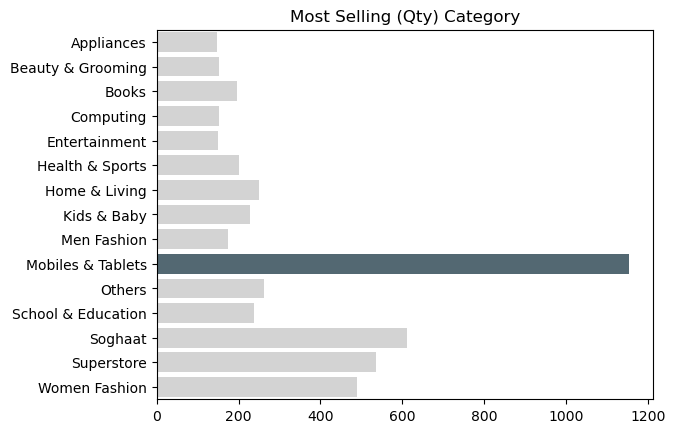

In [234]:
max_vals = max(df_most_selling_cat.qty_ordered)
ax = sns.barplot(df_most_selling_cat, y=df_most_selling_cat.index, x=df_most_selling_cat['qty_ordered'], color='lightgray')

highest_width = 0
counter = 0
idx = 0
for w in ax.patches:
    if w.get_width() > highest_width:
        highest_width = w.get_width()
        idx = counter
    counter+=1

ax.patches[idx].set_facecolor('#536872')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Most Selling (Qty) Category')
# frame = plt.gca()
# frame.axes.get_xaxis().set_visible(False)

Top Category is determined by the frequency of the customers has checked out the items and do payment for each category.

In [235]:
df_top_cat = df.loc[:, select_cols].query('is_valid == 1').groupby(['category', df.order_date.dt.year])['order_date'].count()
df_top_cat = pd.DataFrame(df_top_cat)

In [236]:
df_top_cat.rename(columns={'order_date':'count'}, inplace=True)

In [237]:
df_top_cat.head(3)

count
category          order_date       
Appliances        2021           99
                  2022          121
Beauty & Grooming 2021          138

In [238]:
df_pivot = pd.pivot_table(df_top_cat, index=[df_top_cat.index.get_level_values('order_date')], 
    columns=[df_top_cat.index.get_level_values('category')],
    values='count')
df_pivot
# max(df_pivot.iloc[0])

category,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women Fashion
order_date,,,,,,,,,,,,,,,
2021,99,138,119,92,68,144,143,139,117,71,138,143,138,133,121
2022,121,123,136,137,128,164,179,173,153,79,171,168,154,180,143


In [239]:
df_top_cat_22 = df_top_cat.loc[(df_top_cat.index.get_level_values(0), 2022), 'count']
df_top_cat_22 = pd.DataFrame(df_top_cat_22)

In [240]:
df_top_cat_22.head()

,,count
category,order_date,
Appliances,2022,121
Beauty & Grooming,2022,123
Books,2022,136
Computing,2022,137
Entertainment,2022,128


Text(0.5, 1.0, 'Top 5 Most Checked Out Categories in 2022')

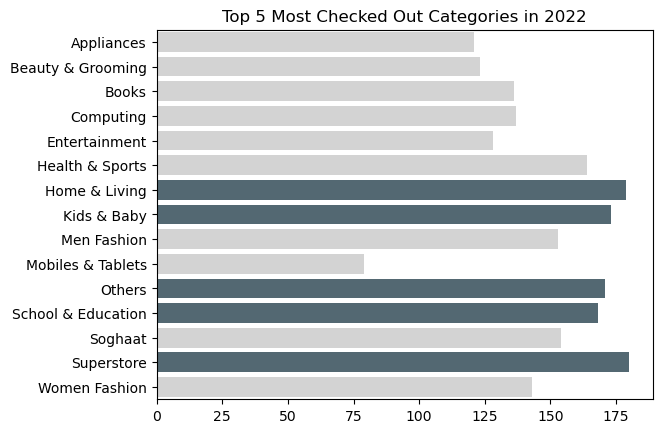

In [241]:
max_vals = max(df_top_cat_22['count'])
ax = sns.barplot(df_top_cat_22, y=df_top_cat_22.index.get_level_values('category'), x=df_top_cat_22['count'], color='lightgray')

max_top = 5
top = {}
tops = []
tops_idx = []
def check_top(value, idx_):
    if (len(tops) == 0) | (value in tops) :
        return True
    elif len(tops) > 0 and len(np.unique(np.array(tops))) < max_top:
        return True
    elif len(tops) > 0 and (value > max(tops) and len(np.unique(np.array(tops))) < max_top):
        return True
    elif len(tops) > 0 and value >= min(tops) and len(np.unique(np.array(tops))) == max_top:
        tops_idx.remove(idx_)
        tops.remove(min(tops))
        return True
    elif len(tops) > 0 and value > max(tops) and len(np.unique(np.array(tops))) == max_top:
        tops_idx.remove(idx_)
        tops.remove(min(tops))
        return True
    else:
        return False

counter = 0
idx = 0
for w in ax.patches:
    isAppend = check_top(w.get_width(), (top[min(tops)] if len(tops) != 0 else 0) )
    if isAppend:
        idx = counter
        top[w.get_width()] = idx
        tops.append(w.get_width())
        tops_idx.append(idx)        
    counter+=1

[ax.patches[i].set_facecolor('#536872') for i in tops_idx]
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Top 5 Most Checked Out Categories in 2022')

Text(0.5, 1.0, 'Sales Comparison in Category')

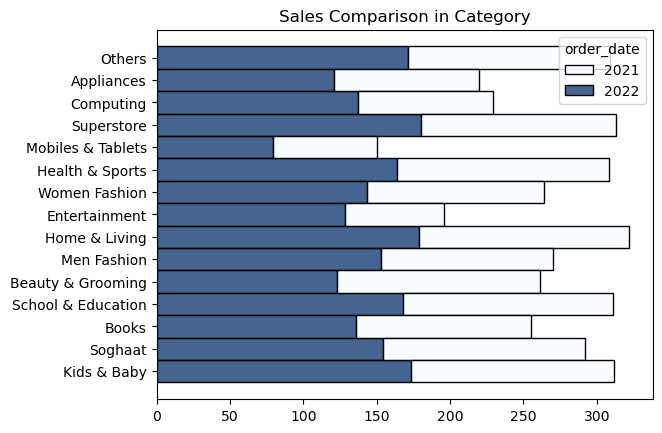

In [242]:
# colors = ["#536872", "#d7efef"]
# custom = sns.set_palette(sns.color_palette(colors))
ax = sns.histplot(df[df.is_valid==1], y='category', palette='Blues', hue=df.order_date.dt.year, multiple='stack')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Sales Comparison in Category')

Superstore, Home & Living, Kids & Baby, School & Education & Others are the top categories with the most checkouts in 2022. <br>
However, **compared to the previous year, sales experienced a decline.**

- Due to a decline in product sales, we are planning a campaign to boost the sales growth. <br>
One of the initiative idea is 'Gebyar Dadakan' campaign. This campaign is designed to attract both new and existing customers through engaging games and exciting reward.<br>
Winners will receive a gadget from the 'Mobiles & Tablets' category with specific reward being chosen from the *Top selling items in that category* in 2022.<br>

In [243]:
df_select = df[select_cols]

In [244]:
pd.reset_option('all')
print('2022')
df_result = df_select[df_select.order_date.dt.year == 2022]\
    .query("is_valid==1 & category=='Mobiles & Tablets'")\
    .groupby(['sku_name'])['qty_ordered'].sum()

df_result.sort_values(ascending=False).head(10)

2022


sku_name
IDROID_BALRX7-Gold                      1000
IDROID_BALRX7-Jet black                   31
Infinix Hot 4-Gold                        15
samsung_Grand Prime Plus-Black            11
infinix_Zero 4-Grey                       10
samsung_Grand Prime Plus-Silver           10
iphone_7-128GB-wof-Matt Black              6
Samsung-Galaxy-S8-G955-Plus-Black          5
iphone_7-128GB-wof-Jet Black               5
samsungGALAXY J510F-2016 DS LTE-Gold       4
Name: qty_ordered, dtype: int64

In [245]:
pd.read_sql(con=conn, sql=""" 
    SELECT strftime('%Y', od.order_date) as order_year,
        sk.sku_name,
        sum(od.qty_ordered) as total_qty_ordered
    FROM order_detail od
    INNER JOIN sku_detail sk ON sk.id = od.sku_id
    WHERE strftime('%Y', od.order_date) = '2022' AND od.is_valid = 1 AND sk.category = 'Mobiles & Tablets'
    GROUP BY order_year, sk.sku_name
    ORDER BY total_qty_ordered DESC
    LIMIT 5""")

,order_year,sku_name,total_qty_ordered
0,2022,IDROID_BALRX7-Gold,1000
1,2022,IDROID_BALRX7-Jet black,31
2,2022,Infinix Hot 4-Gold,15
3,2022,samsung_Grand Prime Plus-Black,11
4,2022,infinix_Zero 4-Grey,10


Top 5 products above will be picked randomly as a reward from 'Mobile & Tablets' category.

- Company has observed a decline in 'Others' category and has requested a thorough investigation.

In [246]:
# check product sales 2021 & 2022
df_result_cat_21 = df_select[df_select.order_date.dt.year == 2021]\
    .query("is_valid == 1")\
    .groupby(['category'])['qty_ordered'].sum()

df_result_cat_22 = df_select[df_select.order_date.dt.year == 2022]\
    .query("is_valid == 1")\
    .groupby(['category'])['qty_ordered'].sum()


In [247]:
df_merge_ = pd.merge(left=df_result_cat_21, right=df_result_cat_22, how='outer', on=['category'])
df_merge_.fillna(value=0, inplace=True)

df_merge_['sales diff'] = df_merge_.qty_ordered_y - df_merge_.qty_ordered_x

In [248]:
df_merge_.rename(columns={'qty_ordered_x':'qty_ordered_2021', 'qty_ordered_y':'qty_ordered_2022'},inplace=True)

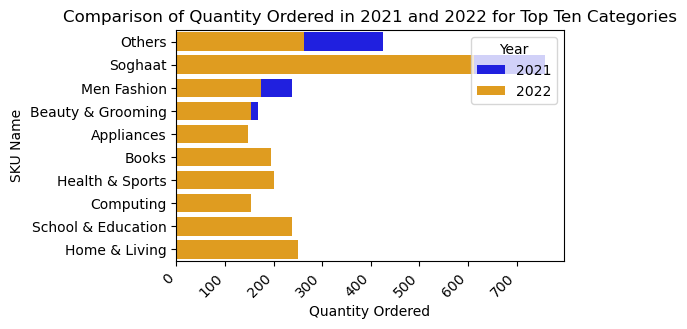

,qty_ordered_2021,qty_ordered_2022,sales diff
category,,,
Others,426,263,-163
Soghaat,759,612,-147
Men Fashion,237,175,-62
Beauty & Grooming,168,153,-15
Appliances,124,148,24


In [249]:
top_ten = df_merge_.sort_values(by='sales diff', ascending=True).head(10)

fig, ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(ax=ax, data=top_ten, y=top_ten.index.get_level_values('category'), x='qty_ordered_2021', color='blue', label='2021') # set label for legend 
ax = sns.barplot(ax=ax, data=top_ten, y=top_ten.index.get_level_values('category'), x='qty_ordered_2022', color='orange', label='2022')

ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('SKU Name')
ax.set_title('Comparison of Quantity Ordered in 2021 and 2022 for Top Ten Categories')
ax.legend(title='Year', loc='upper right')
plt.xticks(rotation=45, ha='right')  
plt.show()

df_merge_.sort_values(by=['sales diff'],ascending=True).head(5)

As figure above, Others, Soghaat, Men Fashion and Beauty & Grooming shown a decline from 2021 to 2022 while the other categories have shown an increase.

In [250]:
df_result_21 = df_select[df_select.order_date.dt.year == 2021]\
    .query("is_valid == 1 & category == 'Others'")\
    .groupby(['sku_name'])['qty_ordered'].sum()

df_result_22 = df_select[df_select.order_date.dt.year == 2022]\
    .query("is_valid == 1 & category == 'Others'")\
    .groupby(['sku_name'])['qty_ordered'].sum()

In [251]:
df_merge_others = pd.merge(left=df_result_21, right=df_result_22, how='outer', on=['sku_name'])
df_merge_others.fillna(value=0, inplace=True)

df_merge_others['sales diff'] = df_merge_others.qty_ordered_y - df_merge_others.qty_ordered_x

In [252]:
df_merge_others.rename(columns={'qty_ordered_x':'qty_ordered_2021', 'qty_ordered_y':'qty_ordered_2022'},inplace=True)
df_merge_others.sort_values(by=['sales diff'],ascending=True).head(20)

,qty_ordered_2021,qty_ordered_2022,sales diff
sku_name,,,
RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
Telemall_MM-DR-HB-L,23.0,2.0,-21.0
iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
kansai_NeverWet,10.0,1.0,-9.0
sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
emart_00-1,7.0,1.0,-6.0
Am-PTV_ATS-004-M,5.0,0.0,-5.0


Figure above shown top 20 products that experienced the highest decline in sales from 2021 to 2022. 

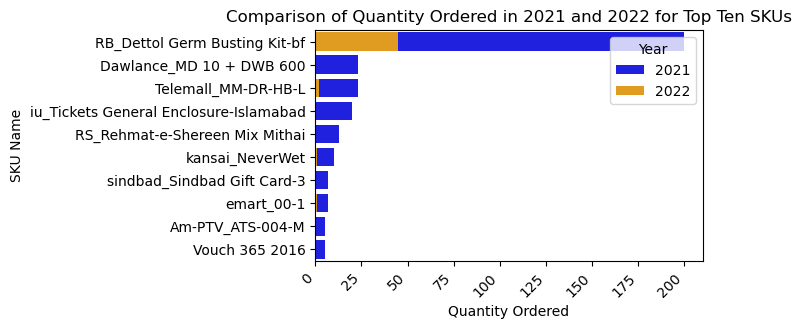

In [253]:
top_ten = df_merge_others.sort_values(by='sales diff', ascending=True).head(10)

fig, ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(ax=ax, data=top_ten, y=top_ten.index.get_level_values('sku_name'), x='qty_ordered_2021', color='blue', label='2021') # set label for legend 
ax = sns.barplot(ax=ax, data=top_ten, y=top_ten.index.get_level_values('sku_name'), x='qty_ordered_2022', color='orange', label='2022')

ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('SKU Name')
ax.set_title('Comparison of Quantity Ordered in 2021 and 2022 for Top Ten SKUs')
ax.legend(title='Year', loc='upper right')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [254]:
select_cols = ['order_date', 'sku_name', 'category', 'price' ,'qty_ordered', 'discount_amount', 'is_valid']

In [255]:
#Price, discount_amount during the period
df_price = df.loc[
    (df.order_date.dt.year == 2021) &
    (df['is_valid'] == 1) &
    (df['category'] == 'Others')
, select_cols].groupby(['sku_name', 'price', 'qty_ordered', 'discount_amount'])['sku_name'].count()

df_price_22 = df.loc[
    (df.order_date.dt.year == 2022) &
    (df['is_valid'] == 1) &
    (df['category'] == 'Others')
, select_cols].groupby(['sku_name', 'price','qty_ordered', 'discount_amount'])['sku_name'].count()

df_price = pd.DataFrame(df_price)
df_price_22 = pd.DataFrame(df_price_22)

df_price.head(3)

,,,,sku_name
sku_name,price,qty_ordered,discount_amount,
Aladdin_Wrench_Snap N Grip_01,121800,1,0.0,1
Aladdin_bike_cover,83404,3,0.0,1
Am-PTV_ATS-004-M,69542,2,0.0,1


In [256]:
# https://pandas.pydata.org/docs/user_guide/advanced.html
print(df_price.index.names)
print(df_price.index.get_level_values('sku_name'))

['sku_name', 'price', 'qty_ordered', 'discount_amount']
Index(['Aladdin_Wrench_Snap N Grip_01', 'Aladdin_bike_cover',
       'Am-PTV_ATS-004-M', 'Am-PTV_ATS-004-M',
       'BFV_Black Friday voucher Rs  1500',
       'BFV_Black Friday voucher Rs  2000', 'BOOSTER CABLE 500AMP',
       'BO_Hippo figured Child Seat', 'BO_Rectangular Sea Pool',
       'Careem_25000 Credits',
       ...
       'pny_OU3 -32GB', 'seagate_SG E-2TB', 'sindbad_Sindbad Gift Card-3',
       'sindbad_Sindbad Gift Card-3', 'sockoye_QG in Quarter Grey',
       'sstop_Universallensclipkit', 'stoner_95160', 'stripyinterior_100006',
       'tucano_IPD7AN-BK', 'vitamin_265'],
      dtype='object', name='sku_name', length=105)


In [257]:
print(2021)
display(df_price[df_price.index.get_level_values('sku_name')\
    .isin(list(top_ten.index.get_level_values('sku_name')[:5]))]
)
print(2022)
display(df_price_22[df_price_22.index.get_level_values('sku_name')\
    .isin(list(top_ten.index.get_level_values('sku_name')[:5]))]
)

2021


sku_name
sku_name                               price  qty_ordered discount_amount          
Dawlance_MD 10 + DWB 600               139200 3           0.0                     1
                                       488360 1           0.0                    15
                                              2           0.0                     2
                                       510400 1           0.0                     1
RB_Dettol Germ Busting Kit-bf          26100  200         2610000.0               1
RS_Rehmat-e-Shereen Mix Mithai         55100  13          0.0                     1
Telemall_MM-DR-HB-L                    20242  1           0.0                     2
                                              3           0.0                     1
                                       26042  1           0.0                     1
                                              2           0.0                     2
                                              12          0.0                     1
                                       46342  1           0.0                     1
iu_Tickets General Enclosure-Islamabad 5800   20          0.0                     1

2022


sku_name
sku_name                      price qty_ordered discount_amount          
RB_Dettol Germ Busting Kit-bf 26100 3           0.0                     1
                                    4           0.0                     1
                                    5           0.0                     2
                              29000 1           0.0                     5
                                    2           0.0                     2
                                                8700.0                  1
                                                18905.1                 1
                                                23200.0                 1
                                    3           13050.0                 1
                                    5           0.0                     2
Telemall_MM-DR-HB-L           26042 2           0.0                     1

Nothing significant to gain from figure above. <br>
It would be better if it provides a table of event to check the deals for each sku_name/category offering. <br>
By integrating both table, it can gain insight into *how discounts and events affect the customer buying behaviour*.<br>

- Company observed some of their customers have tendency to checkout their items first then finalize them last. This behaviour tends to create a second thought of customer to cancel the item. In order to prevent this tendency, company wants to offer some deals to customer that has the tendency mentioned above and asking for the list of those customers in 2022.

In [258]:
df_customer_paylater = df.loc[df.order_date.dt.year == 2022, ['registered_date', 'customer_id', 'is_gross']]\
    .query("is_gross == 1").drop_duplicates(subset='customer_id')
display(df_customer_paylater.head(5))
print(df_customer_paylater.shape)

,registered_date,customer_id,is_gross
6,2022-01-19,C313534L,1
7,2021-09-13,C215074L,1
9,2022-05-08,C246762L,1
16,2022-04-13,C805381L,1
18,2021-11-07,C848774L,1


(2359, 3)


In [259]:
df_customer_paylater.to_csv('audience_list.csv', encoding = 'utf-8-sig', index=False)

- Last 3 months of 2022, the company conducted a campaign every weekend and asks for the growth report.

In [260]:
df_week = df.copy()

In [261]:
df_week['day'] = df_week.order_date.dt.day_name()
df_week['date'] = df_week.order_date.dt.day
df_week['month'] = df_week.order_date.dt.month
df_week['year'] = df_week.order_date.dt.year

In [262]:
weekend_sales = df_week.loc[
    (df_week.year == 2022) &
    (df_week.month.isin([10, 11, 12])) &
    (df_week.day.isin(['Saturday', 'Sunday'])) &
    (df_week.is_valid == 1)
, ['month', 'category', 'qty_ordered', 'before_discount', 'discount_amount', 'after_discount']]\
    .groupby(['category', 'month'])[['qty_ordered','before_discount']].sum()

weekend_sales.head(3)

qty_ordered  before_discount
category          month                              
Appliances        10               2        2476020.0
                  12               1         409422.0
Beauty & Grooming 10               2         800400.0

In [263]:
weekend_sales = weekend_sales.sort_values(by=['month', 'qty_ordered']).groupby(['month'])[['qty_ordered', 'before_discount']].sum()
display(weekend_sales)
weekend_sales.sum()

,qty_ordered,before_discount
month,,
10,40,17125022.0
11,27,11548090.0
12,38,8211988.0


qty_ordered             105.0
before_discount    36885100.0
dtype: float64

Total product successfully sold out in October to December 2022 on weekend has reached 105 items. 

In [264]:
weekday_sales = df_week.loc[
    (df_week.year == 2022) &
    (df_week.month.isin([10, 11, 12])) &
    (~df_week.day.isin(['Saturday', 'Sunday'])) &
    (df_week.is_valid == 1)
, ['category', 'month', 'qty_ordered', 'before_discount', 'discount_amount', 'after_discount']]\
    .groupby(['category', 'month'])[['qty_ordered','before_discount']].sum()


In [265]:
weekday_sales = weekday_sales.sort_values(by=['month', 'qty_ordered']).groupby(['month'])[['qty_ordered', 'before_discount']].sum()
display(weekday_sales)
weekday_sales.sum()

,qty_ordered,before_discount
month,,
10,59,39361062.0
11,94,37227996.0
12,85,51255180.0


qty_ordered              238.0
before_discount    127844238.0
dtype: float64

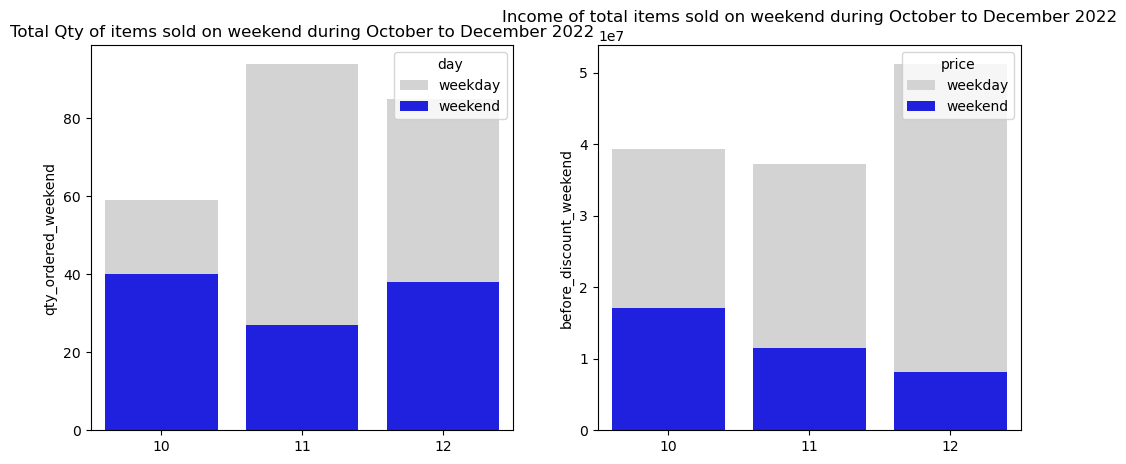

,qty_rate(%),gross_income_rate(%)
month,,
10,67.80,43.51
11,28.72,31.02
12,44.71,16.02


In [266]:
df_full = pd.merge(left=weekend_sales, right=weekday_sales, how='inner', on=['month'])
df_full.rename(columns={
    'qty_ordered_x':'qty_ordered_weekend', 
    'qty_ordered_y':'qty_ordered_weekday',
    'before_discount_x':'before_discount_weekend',
    'before_discount_y':'before_discount_weekday'
}, inplace=True)

assigned = {
    "qty_rate(%)": round(100*df_full.qty_ordered_weekend/df_full.qty_ordered_weekday,2),
    "gross_income_rate(%)": round(100*df_full.before_discount_weekend/df_full.before_discount_weekday,2)
}
df_full = df_full.assign(**assigned) # ** key args

fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
ax = sns.barplot( data=df_full, y='qty_ordered_weekday', x=df_full.index.get_level_values('month'), color='lightgray', label='weekday')
ax = sns.barplot( data=df_full, y='qty_ordered_weekend', x=df_full.index.get_level_values('month'), color='blue', label='weekend')
ax.legend(title='day', loc='upper right')
ax.set_title('Total Qty of items sold on weekend during October to December 2022')
ax.set_xlabel(None)

fig.add_subplot(1,2,2)
ax = sns.barplot( data=df_full, y='before_discount_weekday', x=df_full.index.get_level_values('month'), color='lightgray', label='weekday')
ax = sns.barplot( data=df_full, y='before_discount_weekend', x=df_full.index.get_level_values('month'), color='blue', label='weekend')
ax.legend(title='price', loc='upper right')
ax.set_title('Income of total items sold on weekend during October to December 2022')
ax.set_xlabel(None)

plt.show()

display(df_full.iloc[:, 4:])

Total qty of items sold during October weekend campaign, exceeded 50% of weekday sales.<br>
In November, the effect of campaign only reached 29% of item sales and 45% in December.<br>
For gross income shown a decline during 3 months.

- Company aims to assess the progression of sales income throughout 2022 to evaluate its profit gain.

In [267]:
df_profit = df.copy()

In [268]:
# net_profit is calculated after substracting total expenses(incl. discount)
assigned_profit = {
    "net_profit": df_profit.after_discount - (df_profit.cogs*df_profit.qty_ordered),
}
df_profit = df_profit.assign(**assigned_profit)
df_profit.net_profit = df_profit.net_profit.astype('int64')
df_profit.head(2)

,id,registered_date,customer_id,order_date,sku_name,category,cogs,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_method,net_profit
0,ODR9939707760w,2021-07-07,C713589L,2021-11-19,RB_Dettol Germ Busting Kit-bf,Others,18270,26100,200,5220000.0,2610000.0,2610000.0,1,1,0,jazzwallet,-1044000
1,ODR7448356649d,2021-11-20,C551551L,2021-11-19,PS4_Slim-500GB,Entertainment,1321182,1971942,5,9859710.0,2464927.5,7394782.5,1,0,0,jazzwallet,788872


In [269]:
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Sales Trend 2022')

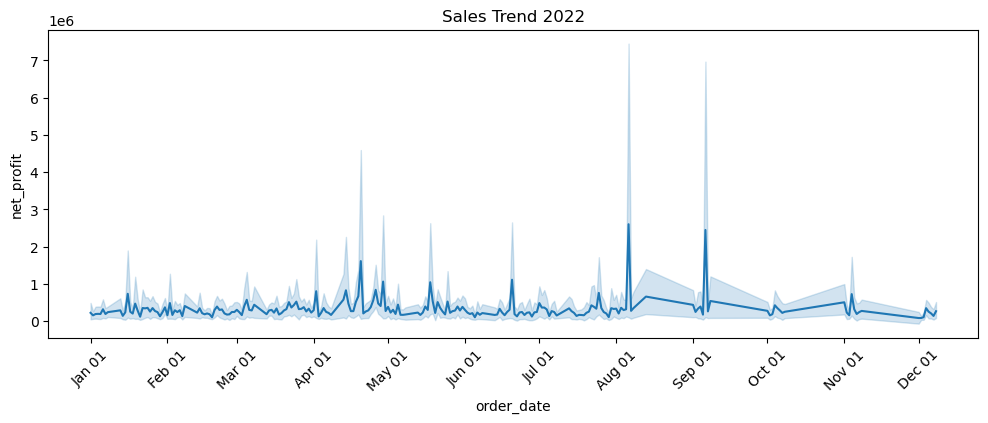

In [270]:
fig = plt.figure(figsize=(12,4))
ax = sns.lineplot(data = df_profit[df_profit.order_date.dt.year==2022], x='order_date', y='net_profit', errorbar=('ci', 95))

# Set x-axis labels format
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)
ax.set_title('Sales Trend 2022')


In [283]:
# AOV is calculated by dividing the total revenue by total number of unique orders. (not sales per customer)

aov = df_profit[df_profit.order_date.dt.year==2022].before_discount.sum()\
    /df_profit[df_profit.order_date.dt.year==2022].drop_duplicates(subset='id', inplace=False).count()[0]
print("AOV 2022: ", aov.round(2))

AOV 2022:  1605927.64


- Besides the sales, Company wants to know their customer behaviour and evaluate the possibility of repurchase rate and their customer retention rate

In [ ]:
...